In [12]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Importar a base de dados.

df = pd.read_csv('advertising.csv')
display(df)
# Valor da coluna 'Vendas' em milhões, e o resto em milhares (fora o index)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Passo 1: Entendimento da área/empresa

In [14]:
# Análise exploratória: visualizar como as informações de cada item estão distribuídas | ver a correlação entre os itens.
# Como queremos pegar o lucro da empresa, a correlação das vendas com os outros itens é o que mais importa. Como a TV é o item que mais tem influência no lucro (0.9 de 1),
# quanto mais investir na TV, maior será o lucro.

display(df.corr())

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


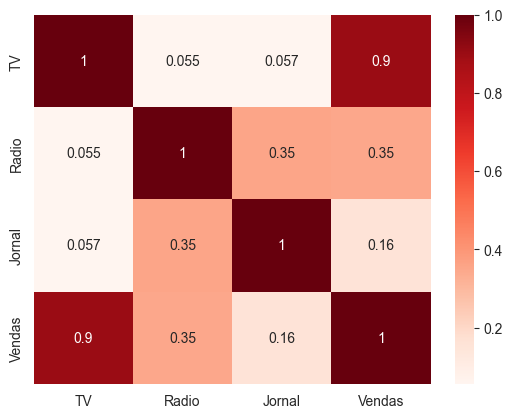

In [15]:
# Vamos criar um gráfico para a correlação ficar mais visual.

sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.show()

Passo 2: Previsão de dados com Machine Learning

In [16]:
# Preparação dos dados para o Machine Learning: separando em dados de treino e dados de teste.
# y será a coluna que queremos prever os valores; e x será as colunas que iremos analisar para fazer a previsão.

y = df['Vendas']
x = df[['TV', 'Radio', 'Jornal']]   # Caso tenha várias colunas use: x = df.drop('Vendas').

from sklearn.model_selection import train_test_split    # Importação do módulo que realiza os testes.
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)   # Separa automaticamente os dados para treino e teste.

In [17]:
# Usaremos dois modelos de treino: Regressão Linear e RandomForest(Árvore de Decisão).

# Importar a inteligência artificial.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar a IA.
modelo_regressao_linear = LinearRegression()
modelo_arvore_decisao = RandomForestRegressor()

# Treinar a IA.
modelo_regressao_linear.fit(x_treino, y_treino)
modelo_arvore_decisao.fit(x_treino, y_treino)

RandomForestRegressor()

Passo 3: Avaliação dos modelos

In [18]:
# Vamos testar os modelos e avaliar o melhor para esse caso

previsao_regressao_linear = modelo_regressao_linear.predict(x_teste)
previsao_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

from sklearn.metrics import r2_score    # Módulo que avalia a precisão dos modelos

print(r2_score(y_teste, previsao_regressao_linear))
print(r2_score(y_teste, previsao_arvore_decisao))
# Quanto mais próximo de 1, melhor

0.851702541067703
0.9013104603776814


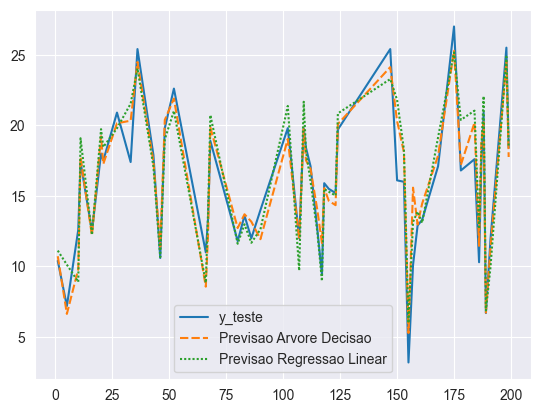

In [19]:
# Visualização gráfica das previsões

# Cria um novo data frame com as colunas abaixo
df_auxiliar = pd.DataFrame()
df_auxiliar['y_teste'] = y_teste
df_auxiliar['Previsao Arvore Decisao'] = previsao_arvore_decisao
df_auxiliar['Previsao Regressao Linear'] = previsao_regressao_linear

# Gráfico (quanto mais próximo da linha y_teste, melhor)
sns.lineplot(data=df_auxiliar)
plt.show()

Passo 4: Nova previsão com outro arquivo

In [20]:
# Nova previsão com outro arquivo

df_novo = pd.read_csv('advertising2.csv')
display(df_novo)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [21]:
# Previsão com base na árvore de decisão

previsao = modelo_arvore_decisao.predict(df_novo)
print(previsao)

[ 7.335  8.218 19.779]


Passo 5: Quantidade de vendas previstas caso a empresa invista em cada mídia

In [22]:
# Novo data frame com a previsão de vendas

df_previsao = df_novo.copy()
df_previsao['Vendas'] = previsao
display(df_previsao)

,TV,Radio,Jornal,Vendas
0,23.1,3.8,69.2,7.335
1,44.5,0.0,5.1,8.218
2,170.2,45.9,0.0,19.779
